In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1I7cU-OwsduzA3kjb3RsD_51wxh5l-UFv

Downloading...
From: https://drive.google.com/uc?id=1I7cU-OwsduzA3kjb3RsD_51wxh5l-UFv
To: /content/cars.csv
100% 25.7k/25.7k [00:00<00:00, 75.3MB/s]


In [ ]:
df = pd.read_csv('cars.csv')
print(df)

                             name   mpg cylinders  displacement  horsepower  \
0    b'chevrolet_chevelle_malibu'  18.0      b'8'         307.0       130.0   
1            b'buick_skylark_320'  15.0      b'8'         350.0       165.0   
2           b'plymouth_satellite'  18.0      b'8'         318.0       150.0   
3                b'amc_rebel_sst'  16.0      b'8'         304.0       150.0   
4                  b'ford_torino'  17.0      b'8'         302.0       140.0   
..                            ...   ...       ...           ...         ...   
401            b'ford_mustang_gl'  27.0      b'4'         140.0        86.0   
402                  b'vw_pickup'  44.0      b'4'          97.0        52.0   
403              b'dodge_rampage'  32.0      b'4'         135.0        84.0   
404                b'ford_ranger'  28.0      b'4'         120.0        79.0   
405                 b'chevy_s-10'  31.0      b'4'         119.0        82.0   

     weight  acceleration  model.year origin  
0   

In [ ]:
#missing data
missing_data = df.isnull()
print(missing_data.sum())

name            0
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model.year      0
origin          0
dtype: int64


In [ ]:
#drop na
df.dropna(inplace=True)

In [ ]:
df.dtypes

name             object
mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model.year      float64
origin           object
dtype: object

In [ ]:
# one hot encoding
df = pd.get_dummies(df, columns=['origin', 'cylinders'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Inisialisasi objek StandardScaler
# scaler = StandardScaler()

In [ ]:
# numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

In [ ]:
# Fit scaler pada data dan transformasikan data
# scaled_data = scaler.fit_transform(df[numeric_cols])

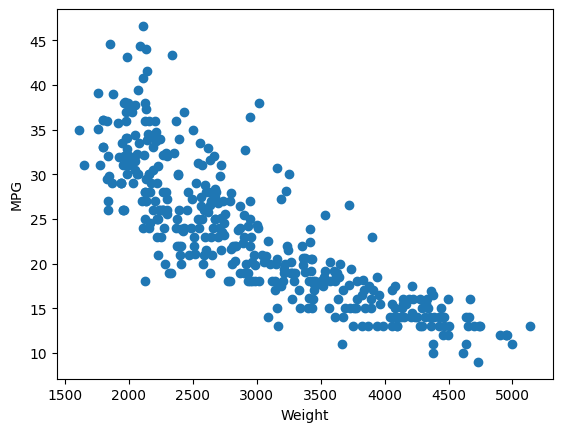

In [ ]:
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

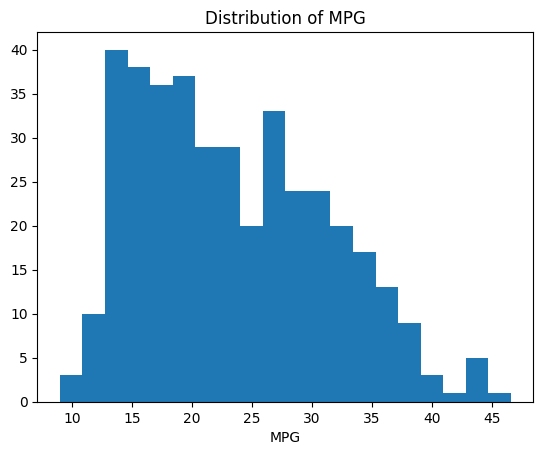

In [ ]:
plt.hist(df['mpg'], bins=20)
plt.xlabel('MPG')
plt.title('Distribution of MPG')
plt.show()

<ipython-input-14-dbc43ea29918>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


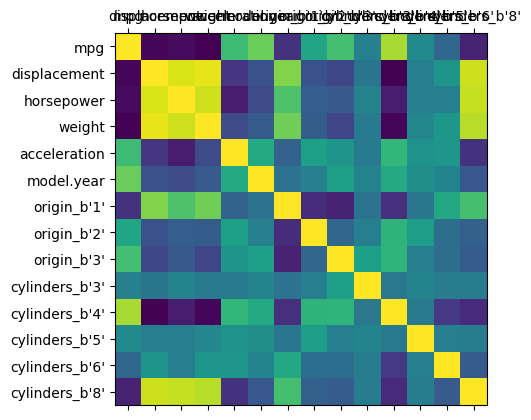

In [ ]:
corr = df.corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-16-7d839943be74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


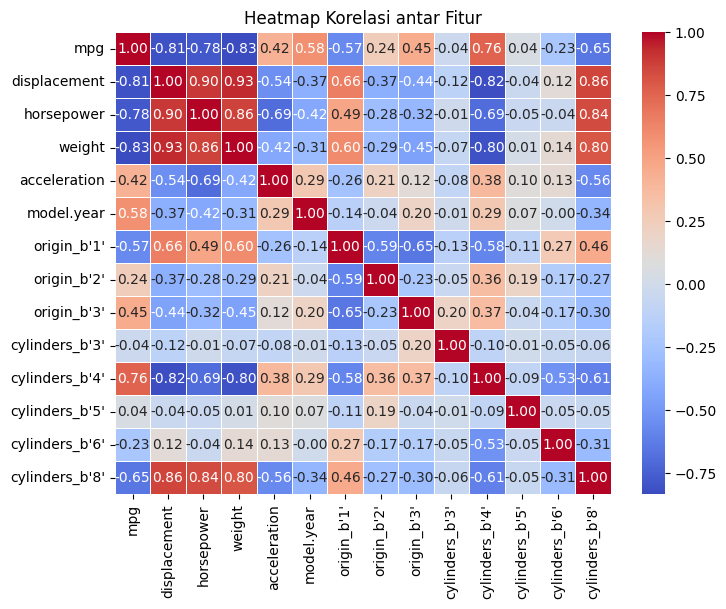

In [ ]:
# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Membuat heatmap korelasi dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

# TPOT

In [ ]:
pip install deap update_checker tqdm stopit xgboost

In [ ]:
pip install tpot

In [ ]:
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor, TPOTClassifier

In [ ]:
# split data, fitur & target
X = df.drop(['mpg', 'name'], axis=1)
y = df['mpg']

In [ ]:
print(X)

     displacement  horsepower  weight  acceleration  model.year  origin_b'1'  \
0           307.0       130.0  3504.0          12.0        70.0            1   
1           350.0       165.0  3693.0          11.5        70.0            1   
2           318.0       150.0  3436.0          11.0        70.0            1   
3           304.0       150.0  3433.0          12.0        70.0            1   
4           302.0       140.0  3449.0          10.5        70.0            1   
..            ...         ...     ...           ...         ...          ...   
401         140.0        86.0  2790.0          15.6        82.0            1   
402          97.0        52.0  2130.0          24.6        82.0            0   
403         135.0        84.0  2295.0          11.6        82.0            1   
404         120.0        79.0  2625.0          18.6        82.0            1   
405         119.0        82.0  2720.0          19.4        82.0            1   

     origin_b'2'  origin_b'3'  cylinder

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Misalnya, SelectKBest dengan ANOVA F-Test untuk klasifikasi
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

In [ ]:
# split train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train)

     displacement  horsepower  weight  acceleration  model.year  origin_b'1'  \
30          199.0        90.0  2648.0          15.0        70.0            1   
206         225.0       100.0  3651.0          17.7        76.0            1   
128         318.0       150.0  3399.0          11.0        73.0            1   
230         318.0       145.0  4140.0          13.7        77.0            1   
91           97.0        88.0  2100.0          16.5        72.0            0   
..            ...         ...     ...           ...         ...          ...   
190         116.0        81.0  2220.0          16.9        76.0            0   
200         200.0        81.0  3012.0          17.6        76.0            1   
131         350.0       180.0  3664.0          11.0        73.0            1   
234         225.0       100.0  3630.0          17.7        77.0            1   
120         155.0       107.0  2472.0          14.0        73.0            1   

     origin_b'2'  origin_b'3'  cylinder

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scal = StandardScaler()

X_train = standard_scal.fit_transform(X_train)

X_test = standard_scal.fit_transform(X_test)

In [ ]:
print(X_train)

[[ 0.03778199 -0.37141548 -0.38130079 ... -0.05661385  1.89814151
  -0.5958006 ]
 [ 0.28684623 -0.11568947  0.80365273 ... -0.05661385  1.89814151
  -0.5958006 ]
 [ 1.17772988  1.16294058  0.50593759 ... -0.05661385 -0.52683111
   1.67841389]
 ...
 [ 1.48427049  1.93011861  0.81901105 ... -0.05661385 -0.52683111
   1.67841389]
 [ 0.28684623 -0.11568947  0.77884313 ... -0.05661385  1.89814151
  -0.5958006 ]
 [-0.38371135  0.06331874 -0.58922883 ... -0.05661385  1.89814151
  -0.5958006 ]]


In [ ]:
tpot = TPOTRegressor(generations=10, population_size=20, cv=5, verbosity=2)

# Fit TPOT on training data
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7.104468552634572

Generation 2 - Current best internal CV score: -7.104468552634572

Generation 3 - Current best internal CV score: -7.104468552634572

Generation 4 - Current best internal CV score: -7.104468552634572

Generation 5 - Current best internal CV score: -6.857776455685348

Generation 6 - Current best internal CV score: -6.852341080578418

Generation 7 - Current best internal CV score: -6.2751572474446125

Generation 8 - Current best internal CV score: -6.2751572474446125

Generation 9 - Current best internal CV score: -6.2751572474446125

Generation 10 - Current best internal CV score: -6.2751572474446125

Best pipeline: XGBRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.3, verbosity=0)


TPOTRegressor(generations=10, population_size=20, verbosity=2)

In [ ]:
tpot.fitted_pipeline_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=10, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=1,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Evaluate pipeline on test set
print(tpot.score(X_test, y_test))

-11.742485575090033


# Experiment

In [ ]:
tpot_light = TPOTRegressor(generations=10, population_size=100, cv=10, verbosity=2, config_dict='TPOT light')

# Fit TPOT on training data
tpot_light.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7.527286114378031

Generation 2 - Current best internal CV score: -7.494190557517994

Generation 3 - Current best internal CV score: -7.494190557517994

Generation 4 - Current best internal CV score: -7.196124918546991

Generation 5 - Current best internal CV score: -6.658928410158869

Generation 6 - Current best internal CV score: -6.35355445565456

Generation 7 - Current best internal CV score: -6.35355445565456

Generation 8 - Current best internal CV score: -6.35355445565456

Generation 9 - Current best internal CV score: -6.35355445565456

Generation 10 - Current best internal CV score: -6.35355445565456

Best pipeline: KNeighborsRegressor(RidgeCV(ElasticNetCV(input_matrix, l1_ratio=0.9500000000000001, tol=0.1)), n_neighbors=5, p=1, weights=distance)


TPOTRegressor(config_dict='TPOT light', cv=10, generations=10, verbosity=2)

In [ ]:
tpot_light.fitted_pipeline_

Pipeline(steps=[('stackingestimator-1',
                 StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.9500000000000001,
                                                          tol=0.1))),
                ('stackingestimator-2', StackingEstimator(estimator=RidgeCV())),
                ('kneighborsregressor',
                 KNeighborsRegressor(p=1, weights='distance'))])

In [ ]:
tpot_light.score(X_test, y_test)

-10.680680876130188

In [ ]:
tpot_sparse = TPOTRegressor(generations=10, population_size=20, cv=5, verbosity=2, config_dict='TPOT sparse')

# Fit TPOT on training data
tpot_sparse.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -6.998627293329785

Generation 2 - Current best internal CV score: -6.998627293329785

Generation 3 - Current best internal CV score: -6.912728226807592

Generation 4 - Current best internal CV score: -6.8820356100013145

Generation 5 - Current best internal CV score: -6.8820356100013145

Generation 6 - Current best internal CV score: -6.8820356100013145

Generation 7 - Current best internal CV score: -6.8820356100013145

Generation 8 - Current best internal CV score: -6.8820356100013145

Generation 9 - Current best internal CV score: -6.8820356100013145

Generation 10 - Current best internal CV score: -6.8820356100013145

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100)


TPOTRegressor(config_dict='TPOT sparse', generations=10, population_size=20,
              verbosity=2)

In [ ]:
tpot_sparse.score(X_test, y_test)

-9.705762445718092

# EVALUATION

In [ ]:
print("TPOT Default:", tpot.score(X_test, y_test))
print("TPOT light:", tpot_light.score(X_test, y_test))
print("TPOT sparse:", tpot_sparse.score(X_test, y_test))

TPOT Default: -11.742485575090033
TPOT light: -10.680680876130188
TPOT sparse: -9.705762445718092


In [ ]:
# Export optimized pipeline
tpot.export('tpot_exported_pipeline.py')